Step - 1 
Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Step - 2
Reading the dataset

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\AI ML\DATA SETS\bottle.csv')
df_binary = df[['Salnty','T_degC']]
df_binary.columns = ['Sal','Temp']
df_binary.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11944\1530609385.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\DELL\Desktop\AI ML\DATA SETS\bottle.csv')


,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


Step - 3
Exploring the data scatter

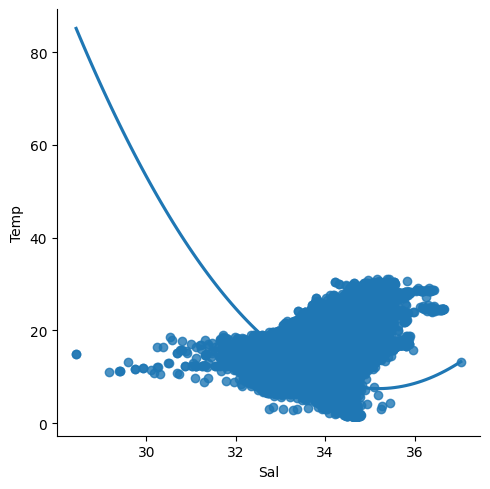

In [3]:
sns.lmplot(x='Sal',y='Temp',data=df_binary,order=2,ci=None)

Step - 4
Data cleaning

In [4]:
df_binary.fillna(method='ffill',inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11944\1829927074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method='ffill',inplace=True)


Step - 5
Training our model

In [5]:
X = np.array(df_binary['Sal']).reshape(-1,1)
y = np.array(df_binary['Temp']).reshape(-1,1)
'''
Seperating the data into independent and dependent variables
Basically splitting data for into training and testing data set
'''
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train,y_train)
print(regr.score(X_test,y_test))

0.20001270564675555


Step - 6
Exploring our result

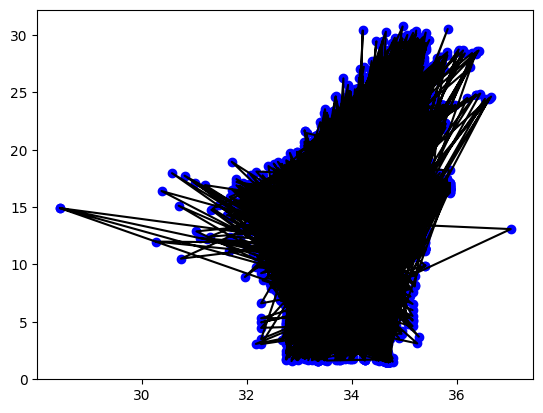

In [6]:
y_pred = regr.predict(X_test)
plt.scatter(X_test,y_test,color='b')
plt.plot(X_test,y_test,color='k')
plt.show()

Step-7
Working with a smaller dataset

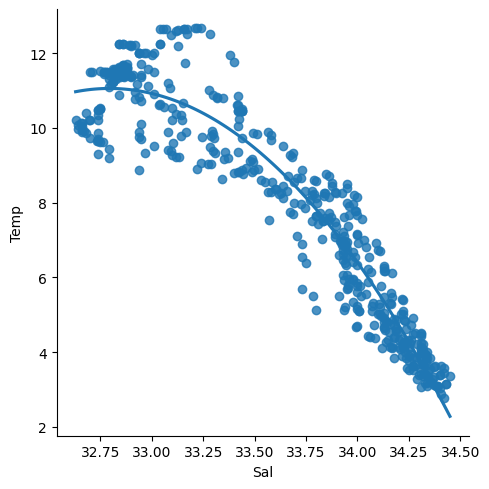

In [8]:
# Selecting the first 500 rows
df_binary500 = df_binary[:][:500]
sns.lmplot(x='Sal',y='Temp',data = df_binary500,order=2,ci=None)

Step - 8
Now using this 500 sample size walla dataset to form another model

In [11]:
X = np.array(df_binary500['Sal']).reshape(-1,1)
y = np.array(df_binary500['Temp']).reshape(-1,1)
'''
Seperating the data into independent and dependent variables
Basically splitting data for into training and testing data set
'''
X_train500,X_test500,y_train500,y_test500 = train_test_split(X,y,test_size = 0.25)
regr1 = LinearRegression()
regr1.fit(X_train500,y_train500)
print(regr1.score(X_test500,y_test500))

0.8202940516249405


Evaluation metrics for regression

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 2.8104869424584424
MSE: 14.51168008526565
RMSE: 3.809419914536287
